In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, BatchNormalization, Dropout
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import numpy as np

In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution
classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
#classifier.add(BatchNormalization())
classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(BatchNormalization())
classifier.add(Conv2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation ='relu'))
#classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))
classifier.add(Dense(units=1, activation='sigmoid'))

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0

In [5]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
base_dir = r'E:\DATA\dog_cat_CNN\train'
dog_dir = os.path.join(base_dir, 'dog')
cat_dir = os.path.join(base_dir, 'cat')

In [9]:
# Get all dog and cat image filenames
all_dog_images = os.listdir(dog_dir)
all_cat_images = os.listdir(cat_dir)

# Shuffle the lists
random.shuffle(all_dog_images)
random.shuffle(all_cat_images)

In [10]:
# Select the first 20% of the shuffled list
selected_dog_images = all_dog_images[:int(len(all_dog_images) * 0.3)]
selected_cat_images = all_cat_images[:int(len(all_cat_images) * 0.3)]

In [11]:
# Define new directories for the selected subset
subset_base_dir = r'E:\DATA\dog_cat_CNN\subset_train'
subset_dog_dir = os.path.join(subset_base_dir, 'dog')
subset_cat_dir = os.path.join(subset_base_dir, 'cat')

# Create the directories if they don't exist
os.makedirs(subset_dog_dir, exist_ok=True)
os.makedirs(subset_cat_dir, exist_ok=True)

In [12]:
# Define new directories for the selected subset
subset_base_dir = r'E:\DATA\dog_cat_CNN\subset_train'

In [13]:
import shutil

# Copy selected dog images to the new directory
for img_name in selected_dog_images:
    src_path = os.path.join(dog_dir, img_name)
    dst_path = os.path.join(subset_dog_dir, img_name)
    shutil.copy(src_path, dst_path)

# Copy selected cat images to the new directory
for img_name in selected_cat_images:
    src_path = os.path.join(cat_dir, img_name)
    dst_path = os.path.join(subset_cat_dir, img_name)
    shutil.copy(src_path, dst_path)

In [14]:
def cutout(img, size=15, prob=0.3):
    """Randomly applies cutout augmentation with a given probability."""
    if np.random.rand() < prob:
        return cutout(img, size)
    return img

In [16]:
datagen = ImageDataGenerator(validation_split=0.2,
                                               rescale = 1./255,
                                                shear_range = 0.2,
                                                zoom_range = 0.2,
                                                horizontal_flip = True)
                                                #preprocessing_function=cutout)

In [17]:
training_set = datagen.flow_from_directory(
    subset_base_dir,
    target_size=(64, 64),  
    batch_size=32,
    class_mode='binary',
    subset='training',  # Set as training data
    shuffle=True,
    seed=42
)

Found 6000 images belonging to 2 classes.


In [18]:
test_set = datagen.flow_from_directory(
    subset_base_dir,
    target_size=(64, 64),  
    batch_size=32,
    class_mode='binary',
    subset='validation',  
    shuffle=True,
    seed=42
)

Found 1500 images belonging to 2 classes.


In [19]:
model = classifier.fit(training_set,
                         steps_per_epoch = 187,
                         epochs = 10,
                         validation_data = test_set,    
                         validation_steps = 46)


Epoch 1/10
187/187 [==============================] - 86s 454ms/step - loss: 0.6911 - accuracy: 0.5320 - val_loss: 0.6807 - val_accuracy: 0.5822
Epoch 2/10
187/187 [==============================] - 49s 261ms/step - loss: 0.6819 - accuracy: 0.5677 - val_loss: 0.6849 - val_accuracy: 0.5788
Epoch 3/10
187/187 [==============================] - 50s 267ms/step - loss: 0.6571 - accuracy: 0.6136 - val_loss: 0.6408 - val_accuracy: 0.6352
Epoch 4/10
187/187 [==============================] - 52s 278ms/step - loss: 0.6281 - accuracy: 0.6491 - val_loss: 0.6193 - val_accuracy: 0.6427
Epoch 5/10
187/187 [==============================] - 49s 263ms/step - loss: 0.6200 - accuracy: 0.6558 - val_loss: 0.5942 - val_accuracy: 0.6814
Epoch 6/10
187/187 [==============================] - 49s 264ms/step - loss: 0.5856 - accuracy: 0.6964 - val_loss: 0.5969 - val_accuracy: 0.6800
Epoch 7/10
187/187 [==============================] - 49s 263ms/step - loss: 0.5653 - accuracy: 0.7068 - val_loss: 0.5555 - val_ac

In [20]:
print(training_set.class_indices)
print(test_set.class_indices)



{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}


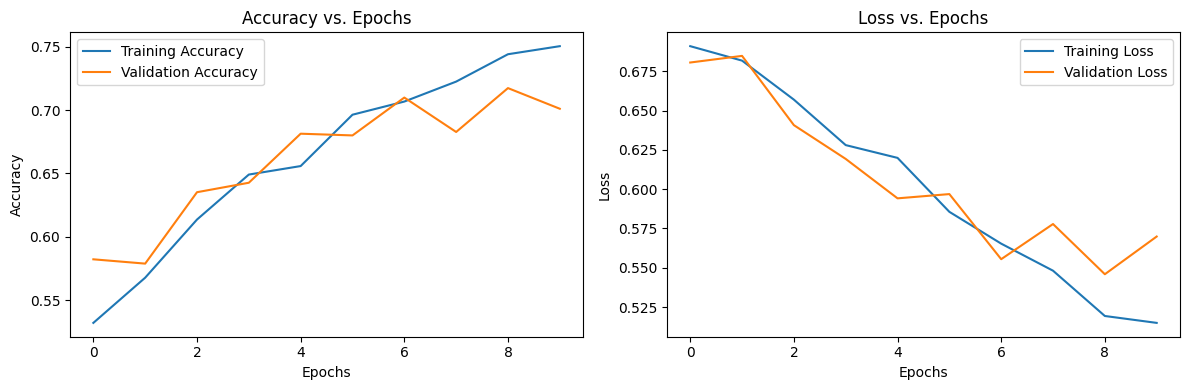

In [21]:
import matplotlib.pyplot as plt


# Plotting the learning curve (accuracy vs. epochs)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model.history['accuracy'], label='Training Accuracy')
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss curve (loss vs. epochs)
plt.subplot(1, 2, 2)
plt.plot(model.history['loss'], label='Training Loss')
plt.plot(model.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
classifier.save("model3.h5")
print("Saved model to disk")

Saved model to disk


In [25]:
from keras.models import load_model

loaded_model = load_model("model3.h5")

In [26]:

from keras.preprocessing import image
test_image = image.load_img(r'E:\DATA\dog_cat_CNN\test1\test1\11.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)

if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

1/1 [==============================] - 0s 117ms/step
cat
